In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset_1 = pd.read_csv('/tmp/creditcard.csv')
dataset_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataset_1.shape

(284807, 31)

In [5]:
# check for null values
dataset_1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
dataset_1['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
# balance the dataset
fraud = dataset_1[dataset_1['Class']==1]
non_fraud = dataset_1[dataset_1['Class']==0]

In [9]:
fraud.shape, non_fraud.shape

((492, 31), (284315, 31))

In [10]:
# random selection of samples
non_fraud_t = non_fraud.sample(n=492)
non_fraud_t.shape

(492, 31)

In [ ]:
dataset = fraud.append(non_fraud_t, ignore_index=True)

In [12]:
print(dataset)

         Time        V1        V2        V3        V4        V5        V6  \
0       406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
1       472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
2      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
3      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
4      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
..        ...       ...       ...       ...       ...       ...       ...   
979   72654.0 -1.116040  0.550557  1.999201 -0.730987  1.413172  0.628691   
980   57058.0  0.677460 -1.193249  0.867352  0.208211 -1.003779  0.948178   
981   31954.0  1.417452 -0.738943  0.627727 -0.812629 -1.158252 -0.266345   
982  113118.0  2.072620 -0.236142 -1.682570 -0.031270  0.324082 -0.356836   
983    6425.0 -0.682715  1.170060 -1.615515  0.300972  2.602454  3.178331   

           V7        V8        V9  ...       V21       V22       V23  \
0  

In [14]:
dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [15]:
x = dataset.drop(labels=['Class'], axis=1)
y = dataset['Class']

In [16]:
x.shape, y.shape

((984, 30), (984,))

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [18]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
x_train


array([[ 0.7496583 ,  0.23478886, -0.22257217, ..., -0.13350885,
         0.03906913, -0.37899067],
       [-0.80535109,  0.50218615, -0.1045168 , ...,  0.48146599,
         0.34975771, -0.37987362],
       [-0.84161679,  0.18631629,  0.08920836, ...,  0.32893666,
         0.25657085, -0.37899067],
       ...,
       [ 1.22354509,  0.30298356, -0.34060018, ..., -0.21120205,
        -0.18110899, -0.04244044],
       [ 1.68120022,  0.8148015 , -0.86154108, ..., -0.06869779,
        -0.16455516, -0.01484832],
       [ 1.55631456,  0.78561729, -0.63834021, ..., -0.09910766,
        -0.12641227, -0.29603038]])

In [21]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [22]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [23]:
x_train = x_train.reshape(787, 30, 1)
x_test = x_test.reshape(197, 30, 1)

In [24]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

In [25]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(30, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool1D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool1D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 30, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 64)             0

In [29]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
25/25 [==============================] - 8s 28ms/step - loss: 0.8745 - accuracy: 0.5781 - val_loss: 0.6528 - val_accuracy: 0.8173
Epoch 2/25
25/25 [==============================] - 0s 8ms/step - loss: 0.6069 - accuracy: 0.7179 - val_loss: 0.6161 - val_accuracy: 0.8173
Epoch 3/25
25/25 [==============================] - 0s 8ms/step - loss: 0.5135 - accuracy: 0.7738 - val_loss: 0.5851 - val_accuracy: 0.8782
Epoch 4/25
25/25 [==============================] - 0s 8ms/step - loss: 0.4234 - accuracy: 0.8247 - val_loss: 0.5577 - val_accuracy: 0.8883
Epoch 5/25
25/25 [==============================] - 0s 8ms/step - loss: 0.3885 - accuracy: 0.8450 - val_loss: 0.5245 - val_accuracy: 0.9239
Epoch 6/25
25/25 [==============================] - 0s 8ms/step - loss: 0.4120 - accuracy: 0.8412 - val_loss: 0.4887 - val_accuracy: 0.9188
Epoch 7/25
25/25 [==============================] - 0s 7ms/step - loss: 0.4027 - accuracy: 0.8653 - val_loss: 0.4451 - val_accuracy: 0.9289
Epoch 8/25
25/25 [=

In [31]:
y_pred = model.predict(x_test)

In [32]:
print(y_pred[1]), print(y_test[1])

[0.21406408]
0


(None, None)

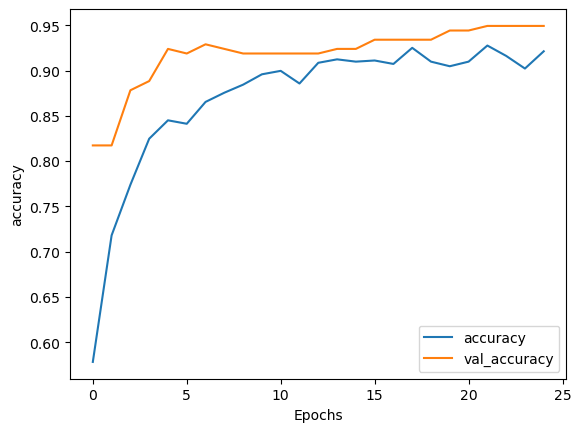

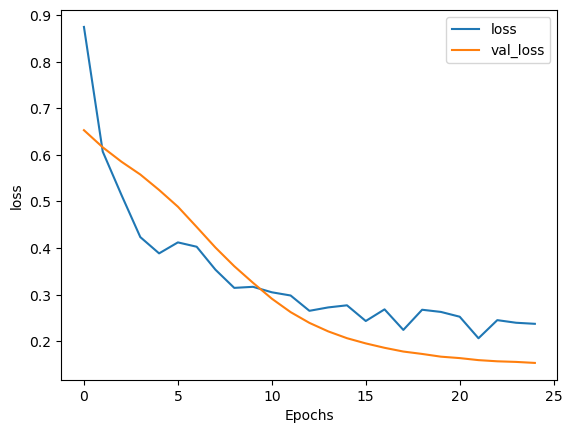

In [33]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")